In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data = pd.read_csv("Titanic-Dataset.csv")

In [3]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

In [4]:
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [6]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [7]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

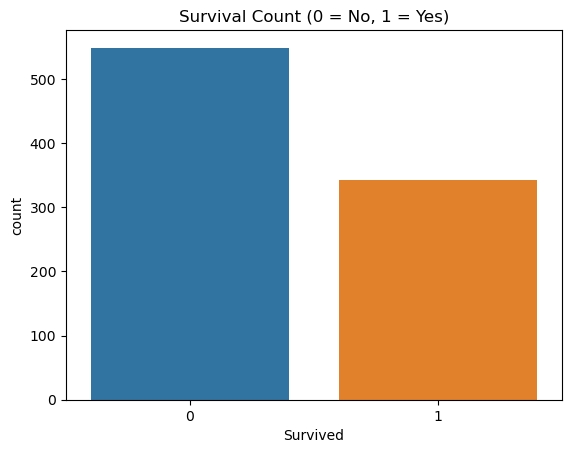

In [8]:
sns.countplot(x='Survived', data=data)
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()

In [9]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [12]:
y_pred = model.predict(X_test)

In [13]:
print(f"\nModel Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



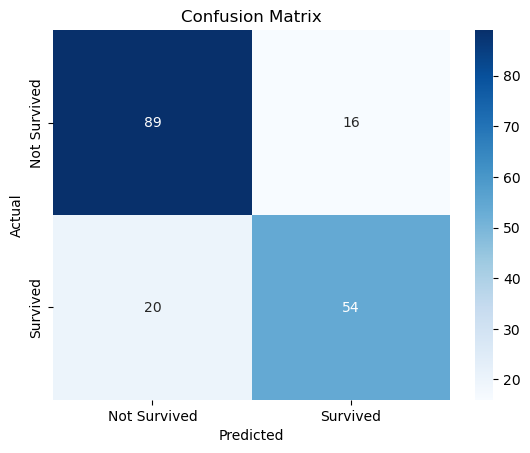

In [16]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [18]:
sample_passenger = pd.DataFrame({
    'Pclass': [3],
    'Sex': [0],  
    'Age': [22],
    'SibSp': [1],
    'Parch': [0],
    'Fare': [7.25],
    'Embarked': [0]  
})

In [19]:
predicted = model.predict(sample_passenger)

In [20]:
print(f"\nPrediction for sample passenger: {'Survived' if predicted[0] == 1 else 'Did Not Survive'}")



Prediction for sample passenger: Did Not Survive


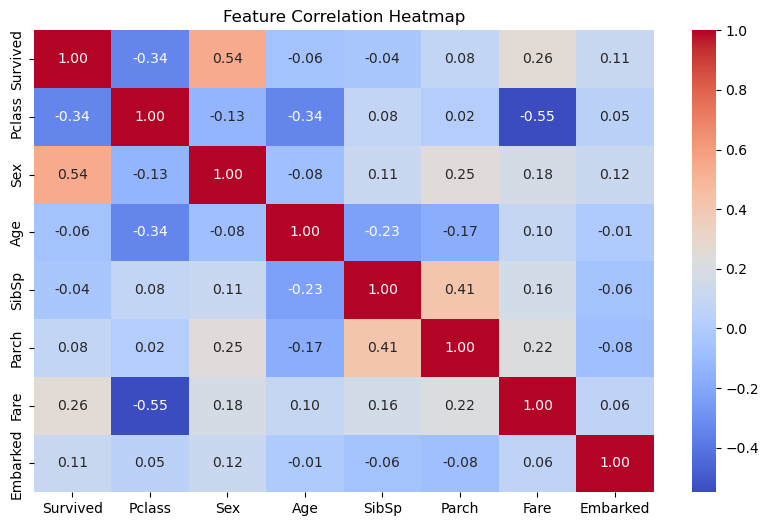

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

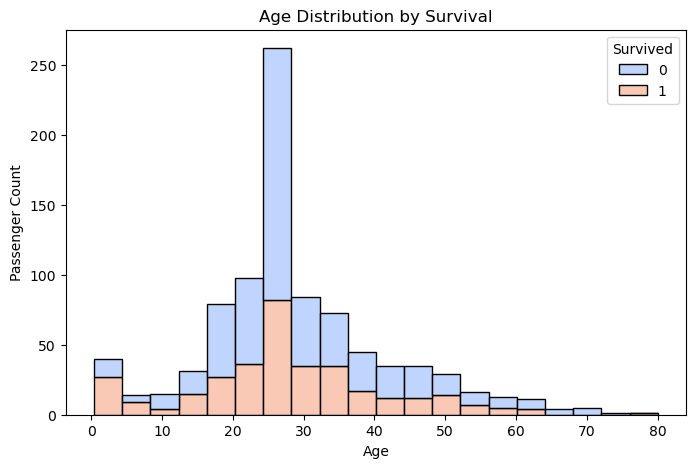

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='Age', hue='Survived', multiple='stack', palette='coolwarm', bins=20)
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Passenger Count")
plt.show()

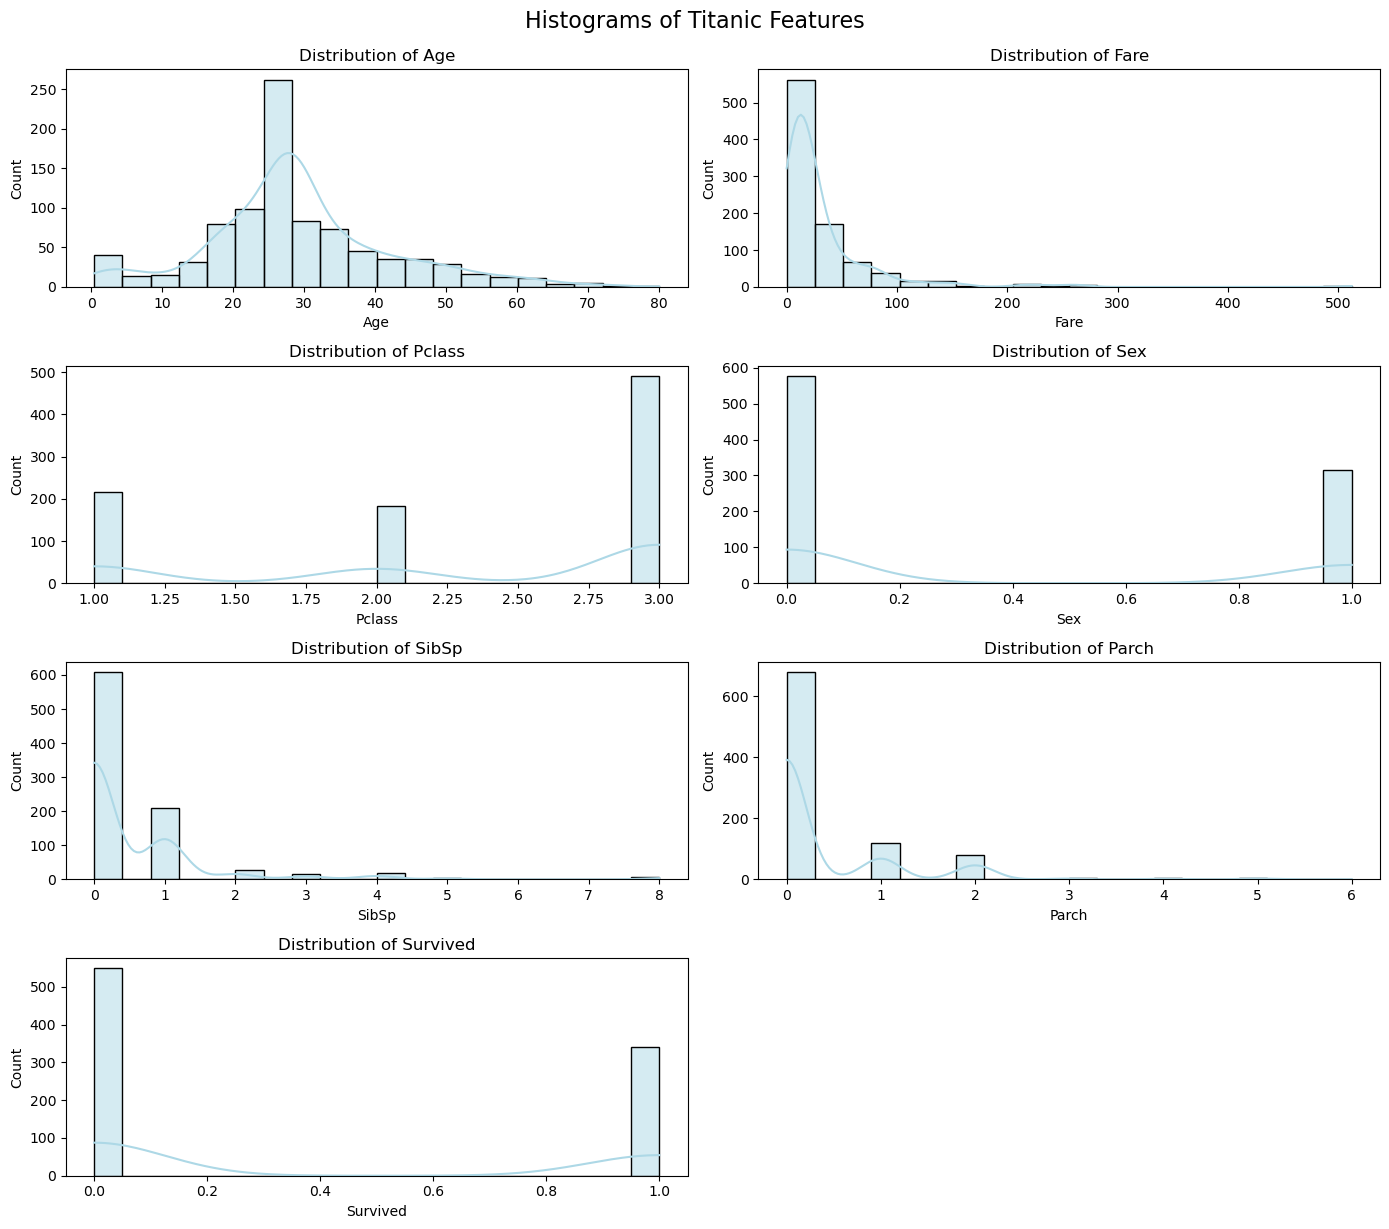

In [23]:
features_to_plot = ['Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Survived']
plt.figure(figsize=(14, 12))
for i, col in enumerate(features_to_plot):
    plt.subplot(4, 2, i + 1)
    sns.histplot(data[col], bins=20, kde=True, color='lightblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.suptitle("Histograms of Titanic Features", fontsize=16, y=1.02)
plt.show()

In [25]:
def plot_scatter_age_fare(data):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x='Age', y='Fare', hue='Survived', palette='coolwarm', alpha=0.7)
    plt.title("Scatter Plot of Age vs Fare (Colored by Survival)")
    plt.xlabel("Age")
    plt.ylabel("Fare")
    plt.legend(title='Survived', labels=['No', 'Yes'])
    plt.grid(True)
    plt.show()

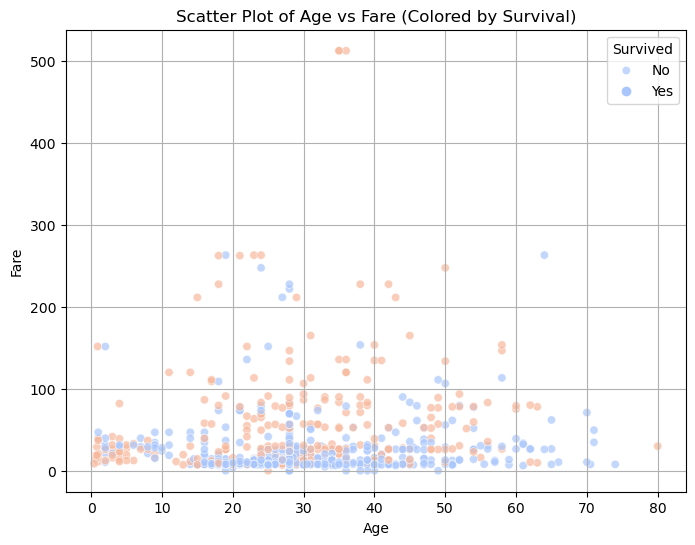

In [26]:
plot_scatter_age_fare(data)

In [27]:
def plot_pie_survival(data):
    survived_counts = data['Survived'].value_counts()
    labels = ['Did Not Survive', 'Survived']
    colors = ['lightcoral', 'skyblue']
    
    plt.figure(figsize=(6, 6))
    plt.pie(survived_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0.05, 0))
    plt.title("Survival Distribution")
    plt.show()


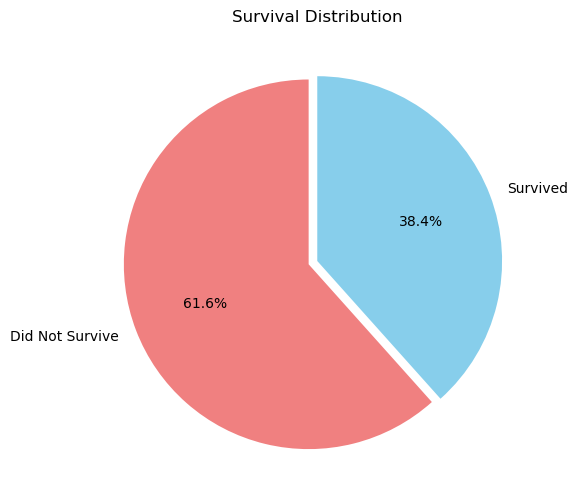

In [28]:
plot_pie_survival(data)

In [29]:
def plot_pie_gender(data):
    gender_counts = data['Sex'].value_counts()
    labels = ['Male', 'Female']
    colors = ['lightgreen', 'lightpink']
    
    plt.figure(figsize=(6, 6))
    plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0.05, 0))
    plt.title("Gender Distribution")
    plt.show()

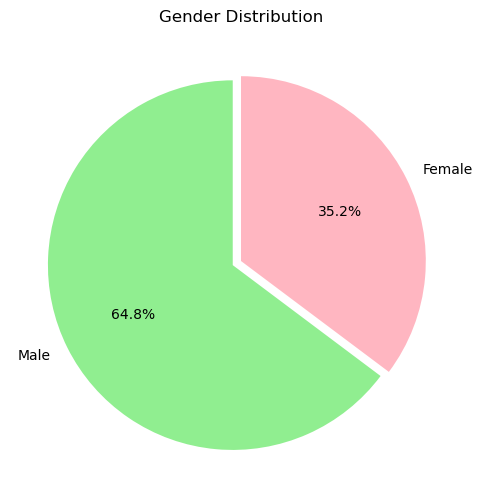

In [30]:

plot_pie_gender(data)